In [11]:
import cv2
import pytesseract
import pandas as pd
from IPython.display import Image
import re


In [12]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    return blur

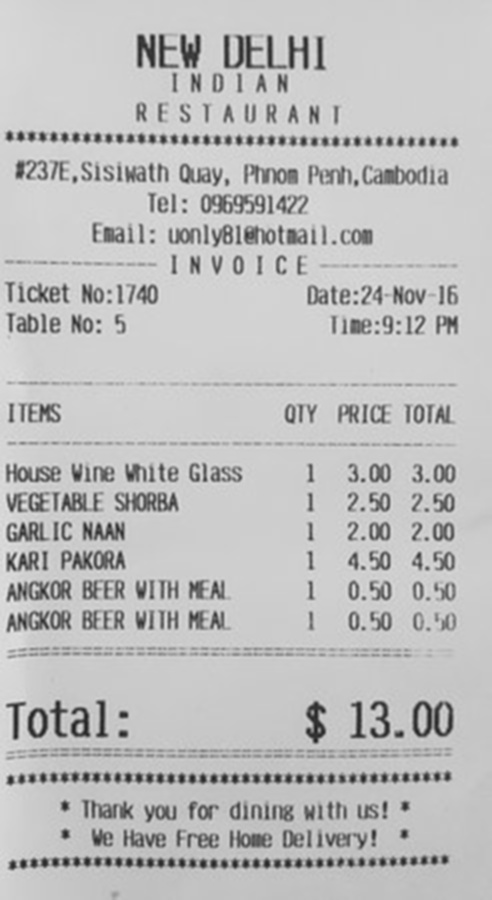

In [13]:
image_path = "receipt4.jpg"
preprocessed_image = preprocess_image(image_path)
preprocessed_image_path = "preprocessed_image.jpg"
cv2.imwrite(preprocessed_image_path, preprocessed_image)
display(Image(preprocessed_image_path))


In [14]:
def extract_text(image):
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(image, config=custom_config)
    return text

text = extract_text(preprocessed_image)


In [15]:
text = extract_text(preprocessed_image)
print("Extracted Text:")
print(text)

Extracted Text:
INDIAN
RESTAURANT
SOESSSCERSESESSSOESEE ESSERE RERE EEE EREEOOES
#237E,Sisivath Quay, Phnom Penh, Cambodia
Tel: 0969591422
Email: uonly81@hotmat!.com

Se VOCE
Ticket No:1740 Date:24-Nov-16
Table No: § Time:9:12 PM
ITEMS QTY PRICE TOTAL
House Wine White Glass 1 3.00 3.00
VEGETABLE SHORBA 1 2.50 2.50
GARLIC NAAN 1 2.00 2.00
KARI PAKORA 1 4.50 4.50
ANGKOR BEER WITH MEAL 1 0.50 0.50
ANGKOR BEER WITH MEAL 1 0.50 0.50
Total: — $ 13.00
sonsnessssesnsssssssnsessnssscsssesnensons

* Thank you for dining with us! *

* We Have Free Home Delivery! *
SeSPESSOEESSSSSSS SERS EER ERE SEF ESSEEEEEET



In [16]:
def extract_invoice_info(text):
    lines = [line.strip() for line in text.split("\n") if line.strip()]
    item = []
    qty = []

    pattern1 = r"^(.*?)\s+(\d+)\s+([\d.]+)\s+([\d.]+)$"
    pattern2 = r"^(\d+)\s+(.*?)\s+([\d.]+)\s+([\d.]+)$"

    for line in lines:
        match = re.match(pattern1, line)
        if match:
            item.append(match.group(1))
            qty.append(match.group(2))
        else:
            alt_match = re.match(pattern2, line)
            if alt_match:
                item.append(alt_match.group(2))
                qty.append(alt_match.group(1))
            else:
                print("Invalid line:", line)

    return item, qty

item, qty = extract_invoice_info(text)


Invalid line: INDIAN
Invalid line: RESTAURANT
Invalid line: SOESSSCERSESESSSOESEE ESSERE RERE EEE EREEOOES
Invalid line: #237E,Sisivath Quay, Phnom Penh, Cambodia
Invalid line: Tel: 0969591422
Invalid line: Email: uonly81@hotmat!.com
Invalid line: Se VOCE
Invalid line: Ticket No:1740 Date:24-Nov-16
Invalid line: Table No: § Time:9:12 PM
Invalid line: ITEMS QTY PRICE TOTAL
Invalid line: Total: — $ 13.00
Invalid line: sonsnessssesnsssssssnsessnssscsssesnensons
Invalid line: * Thank you for dining with us! *
Invalid line: * We Have Free Home Delivery! *
Invalid line: SeSPESSOEESSSSSSS SERS EER ERE SEF ESSEEEEEET


In [17]:
item, qty = extract_invoice_info(text)
print("Item List:")
print(item)
print("Quantity List:")
print(qty)

Invalid line: INDIAN
Invalid line: RESTAURANT
Invalid line: SOESSSCERSESESSSOESEE ESSERE RERE EEE EREEOOES
Invalid line: #237E,Sisivath Quay, Phnom Penh, Cambodia
Invalid line: Tel: 0969591422
Invalid line: Email: uonly81@hotmat!.com
Invalid line: Se VOCE
Invalid line: Ticket No:1740 Date:24-Nov-16
Invalid line: Table No: § Time:9:12 PM
Invalid line: ITEMS QTY PRICE TOTAL
Invalid line: Total: — $ 13.00
Invalid line: sonsnessssesnsssssssnsessnssscsssesnensons
Invalid line: * Thank you for dining with us! *
Invalid line: * We Have Free Home Delivery! *
Invalid line: SeSPESSOEESSSSSSS SERS EER ERE SEF ESSEEEEEET
Item List:
['House Wine White Glass', 'VEGETABLE SHORBA', 'GARLIC NAAN', 'KARI PAKORA', 'ANGKOR BEER WITH MEAL', 'ANGKOR BEER WITH MEAL']
Quantity List:
['1', '1', '1', '1', '1', '1']


In [18]:
def create_dataframe(invoice_info):
    df = pd.DataFrame(invoice_info, columns=['Item', 'Quantity'])
    return df

invoice_info = {'Item': item, 'Quantity': qty}
df = create_dataframe(invoice_info)

In [19]:
df = create_dataframe(invoice_info)
print("DataFrame:")
print(df)

DataFrame:
                     Item Quantity
0  House Wine White Glass        1
1        VEGETABLE SHORBA        1
2             GARLIC NAAN        1
3             KARI PAKORA        1
4   ANGKOR BEER WITH MEAL        1
5   ANGKOR BEER WITH MEAL        1


In [20]:
item_count = df['Item'].value_counts()
df['Quantity'] = df['Quantity'].astype(int)
sum_qty = df['Quantity'].sum()

print("\nItem Count:")
print(item_count)

print('\nTotal Quantity:')
print(sum_qty)


Item Count:
Item
ANGKOR BEER WITH MEAL     2
House Wine White Glass    1
VEGETABLE SHORBA          1
GARLIC NAAN               1
KARI PAKORA               1
Name: count, dtype: int64

Total Quantity:
6
